# Import The Libraries

In [1]:
#main libraries 
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import os ,joblib,missingno
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder,PolynomialFeatures
from sklearn.pipeline import Pipeline ,FeatureUnion
from sklearn_features.transformers import DataFrameSelector
from sklearn.linear_model import LinearRegression ,SGDRegressor ,Ridge ,Lasso,ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV ,GridSearchCV
from xgboost import XGBRegressor

# Load DataSets 

In [2]:
os.getcwd()

'C:\\Users\\mylap'

In [3]:
#file path to read it
FILE_PATH=os.path.join(os.getcwd(),'housing.csv')

In [4]:
# read file by pandas 
df=pd.read_csv(FILE_PATH)

In [5]:
#read the five rows for datasets
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
#check some information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
#show some statstics on datasets
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [8]:
#check missing data
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

<AxesSubplot:>

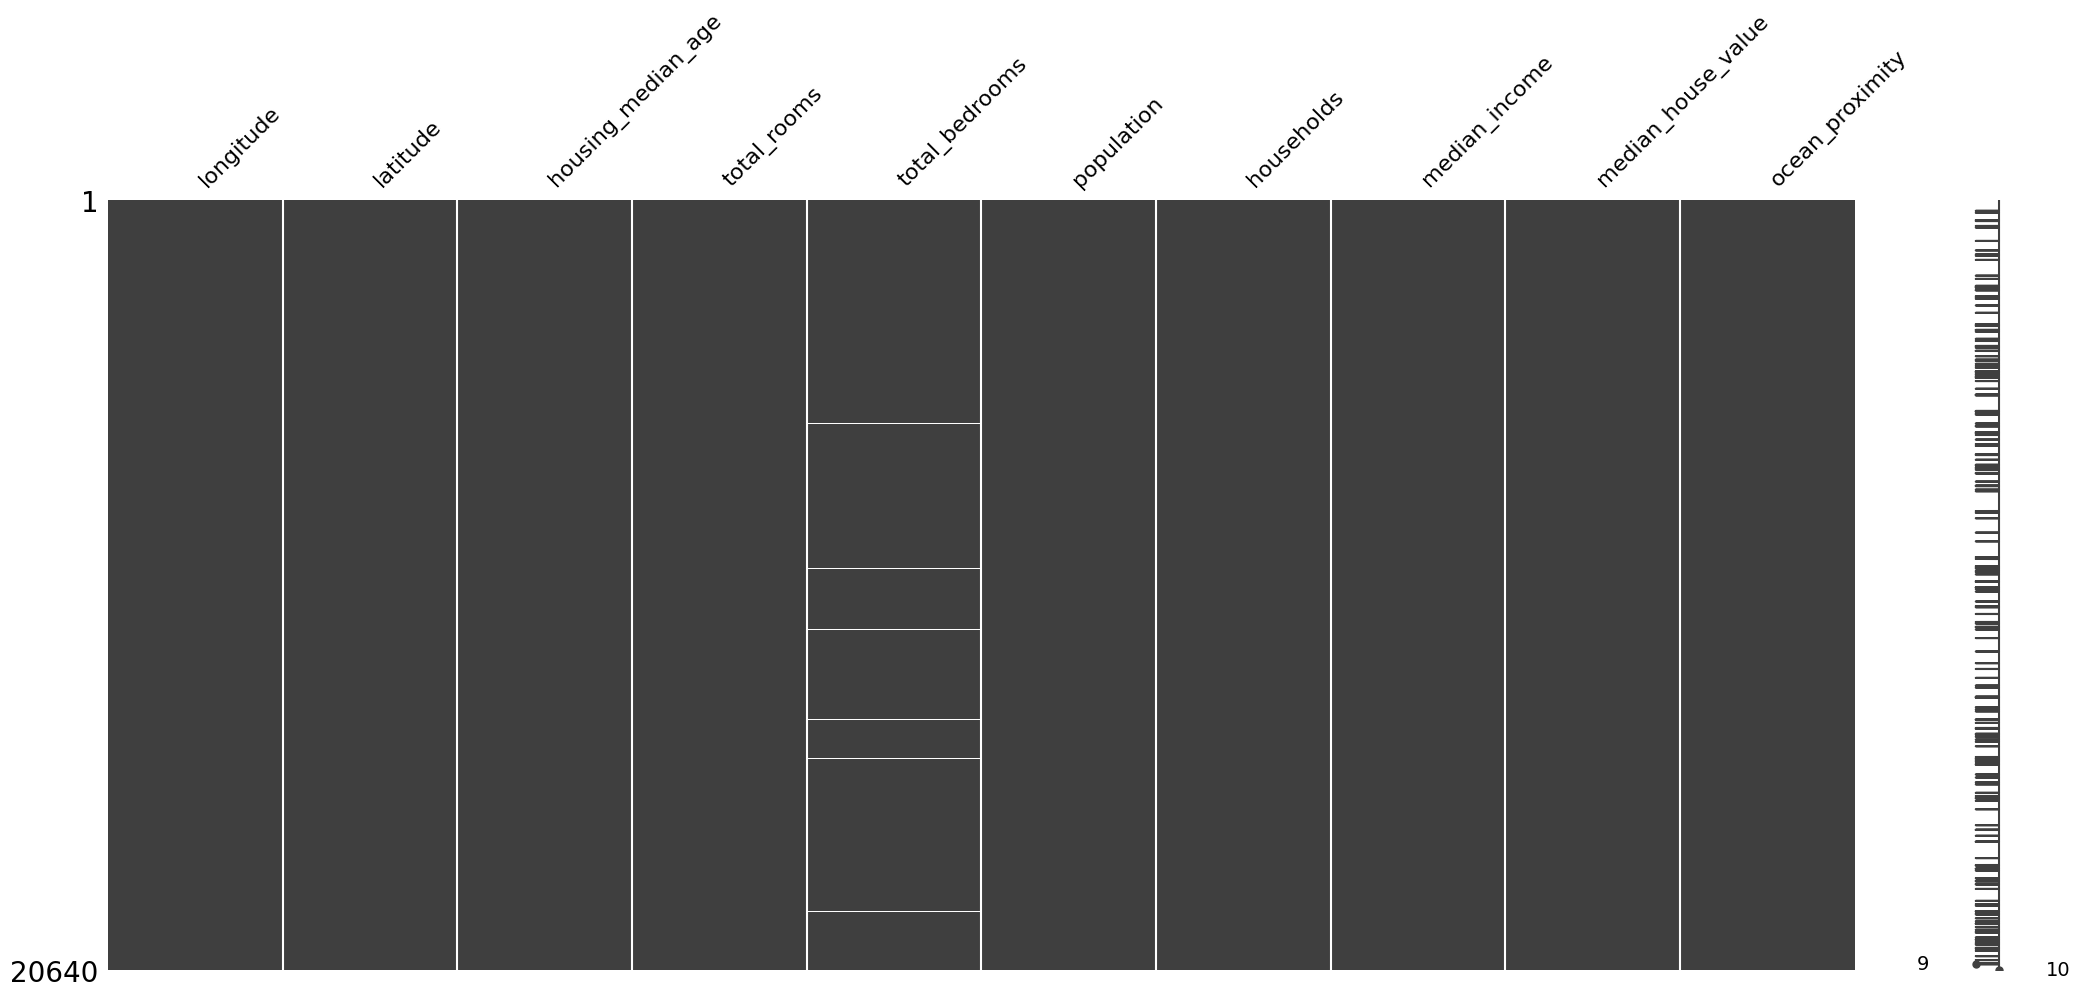

In [9]:
#check missing data by missingno
missingno.matrix(df)

the dataset contains of 10 features with float64 type except ocean_proximity is category 
the data has 207 missing data in total_bedrooms from 20640

# EDA

# Univariate Visulization

In [10]:
ocean_values=df['ocean_proximity'].unique()
ocean_values

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [11]:
ocean_counts=df['ocean_proximity'].value_counts()
ocean_counts.index

Index(['<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'NEAR BAY', 'ISLAND'], dtype='object')

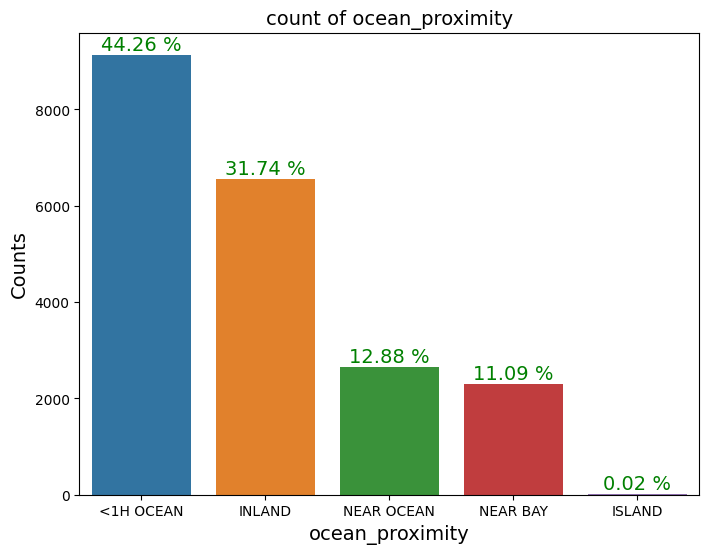

In [12]:
#count plot ocean_vales
plt.figure(figsize=(8,6))

sns.countplot(x='ocean_proximity',data=df,order=ocean_counts.index)
plt.title("count of ocean_proximity",fontsize=14)
plt.xlabel('ocean_proximity',fontsize=14)
plt.ylabel('Counts',fontsize=14)

for i in range(len(ocean_values)):
    p=(ocean_counts[i]/len(df))*100
    t=f'{p:.2f} %'
    plt.text(x=i,y=ocean_counts[i]+100,fontsize=14,s=t,c='g',ha='center')

In [13]:
#replace '<1H OCEAN' to 'OCEAN'
df['ocean_proximity']=df['ocean_proximity'].replace('<1H OCEAN','OCEAN')


In [14]:
df['ocean_proximity'].unique()

array(['NEAR BAY', 'OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

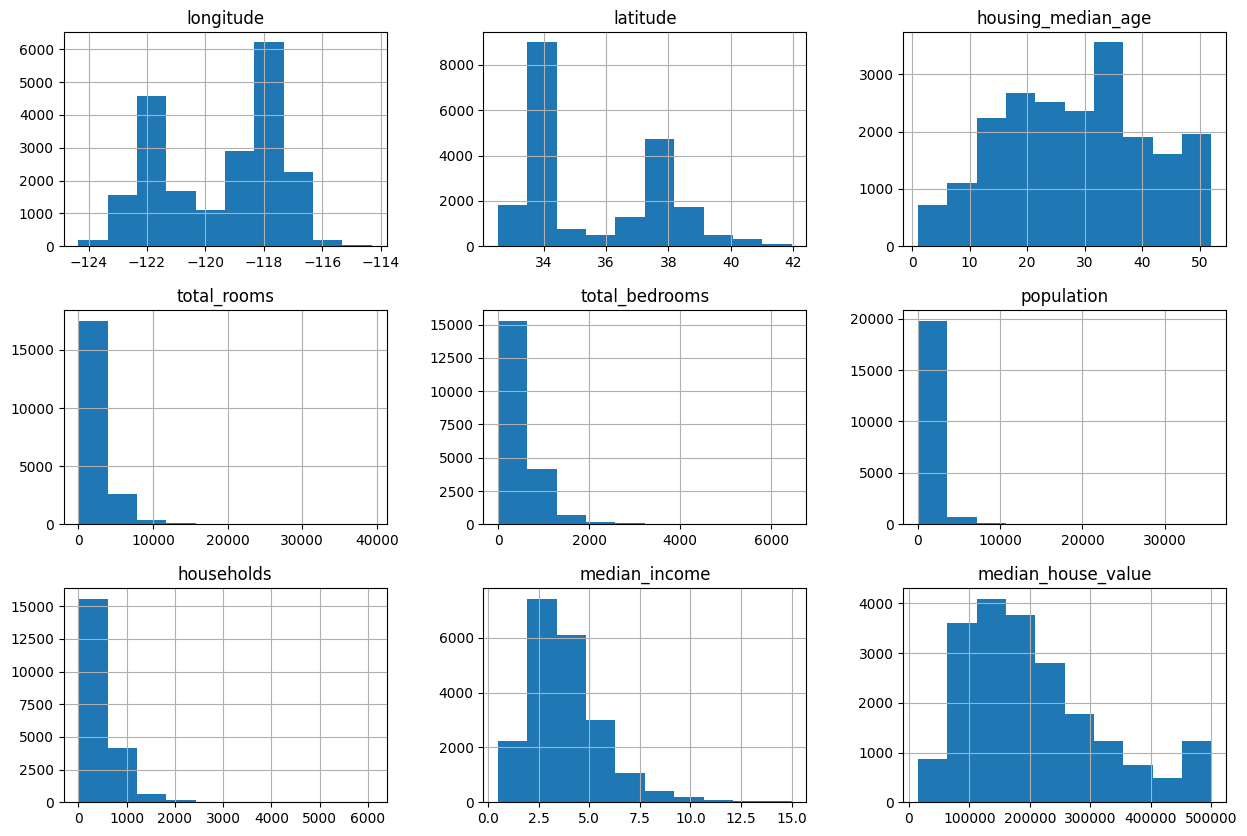

In [15]:
#histogram numerical features 
df.hist(bins=10,figsize=(15,10))
plt.show()

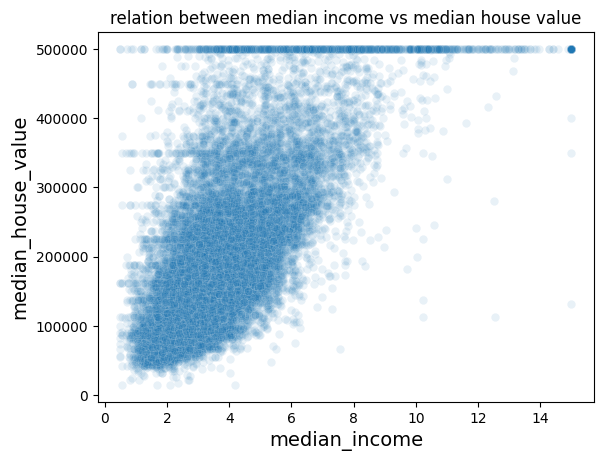

In [16]:
#scatter plot between median income and target(median house value)

sns.scatterplot(x='median_income',y='median_house_value',data=df,alpha=0.1)
plt.title("relation between median income vs median house value",fontsize=12)
plt.xlabel('median_income',fontsize=14)
plt.ylabel('median_house_value',fontsize=14)
plt.show()

In [17]:
df['median_house_value'].describe()

count     20640.000000
mean     206855.816909
std      115395.615874
min       14999.000000
25%      119600.000000
50%      179700.000000
75%      264725.000000
max      500001.000000
Name: median_house_value, dtype: float64

In [18]:
house_median_bins=pd.cut(df['median_house_value'],bins=[-np.inf,100000,200000,300000,400000,500000,np.inf],
       labels=['0-100k','100-200k','200-300k','300-400k','400-500k','600<'])

In [19]:
house_median_bins

0        400-500k
1        300-400k
2        300-400k
3        300-400k
4        300-400k
           ...   
20635      0-100k
20636      0-100k
20637      0-100k
20638      0-100k
20639      0-100k
Name: median_house_value, Length: 20640, dtype: category
Categories (6, object): ['0-100k' < '100-200k' < '200-300k' < '300-400k' < '400-500k' < '600<']

In [20]:
df['median_house_value']

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20640, dtype: float64

In [21]:
house_median_bins.unique()

['400-500k', '300-400k', '200-300k', '100-200k', '0-100k', '600<']
Categories (6, object): ['0-100k' < '100-200k' < '200-300k' < '300-400k' < '400-500k' < '600<']

C:\Users\mylap\anaconda3\envs\RegPro\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


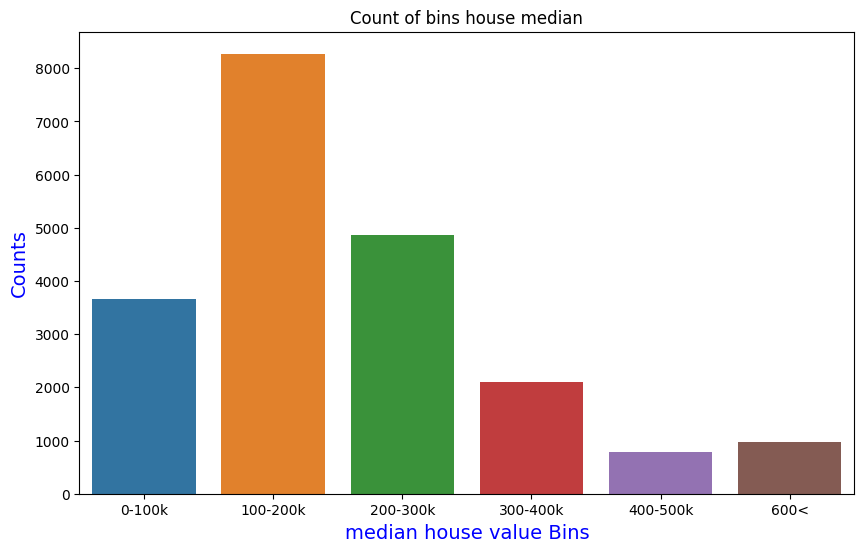

In [22]:
plt.figure(figsize=(10,6))
sns.countplot(house_median_bins)
plt.title("Count of bins house median",fontsize=12)
plt.xlabel('median house value Bins',fontsize=14,c='b')
plt.ylabel('Counts',fontsize=14,c='b')
plt.show()


In [23]:
df['median_income'].describe()

count    20640.000000
mean         3.870671
std          1.899822
min          0.499900
25%          2.563400
50%          3.534800
75%          4.743250
max         15.000100
Name: median_income, dtype: float64

In [24]:
income_median_bins=pd.cut(df['median_income'],bins=[-np.inf,1,2,4,6,np.inf],
       labels=['0-1','1-2','3-4','4-6','6<'])

In [25]:
income_median_bins

0         6<
1         6<
2         6<
3        4-6
4        3-4
        ... 
20635    1-2
20636    3-4
20637    1-2
20638    1-2
20639    3-4
Name: median_income, Length: 20640, dtype: category
Categories (5, object): ['0-1' < '1-2' < '3-4' < '4-6' < '6<']

In [26]:
df['median_income']

0        8.3252
1        8.3014
2        7.2574
3        5.6431
4        3.8462
          ...  
20635    1.5603
20636    2.5568
20637    1.7000
20638    1.8672
20639    2.3886
Name: median_income, Length: 20640, dtype: float64

C:\Users\mylap\anaconda3\envs\RegPro\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


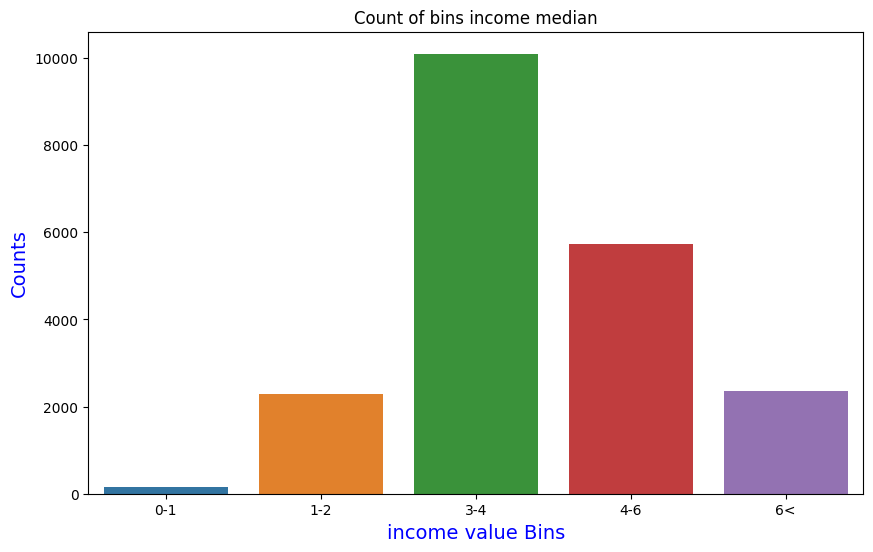

In [27]:
#show income bins
plt.figure(figsize=(10,6))
sns.countplot(income_median_bins)
plt.title("Count of bins income median",fontsize=12)
plt.xlabel('income value Bins',fontsize=14,c='b')
plt.ylabel('Counts',fontsize=14,c='b')
plt.show()

we used bins to know majority on important data and target ,we see the majority in income value baised to 3-4 value ,
in median house value basied to 100-200k, that bins will be impotant in splitting data

# Bivariate Visulization

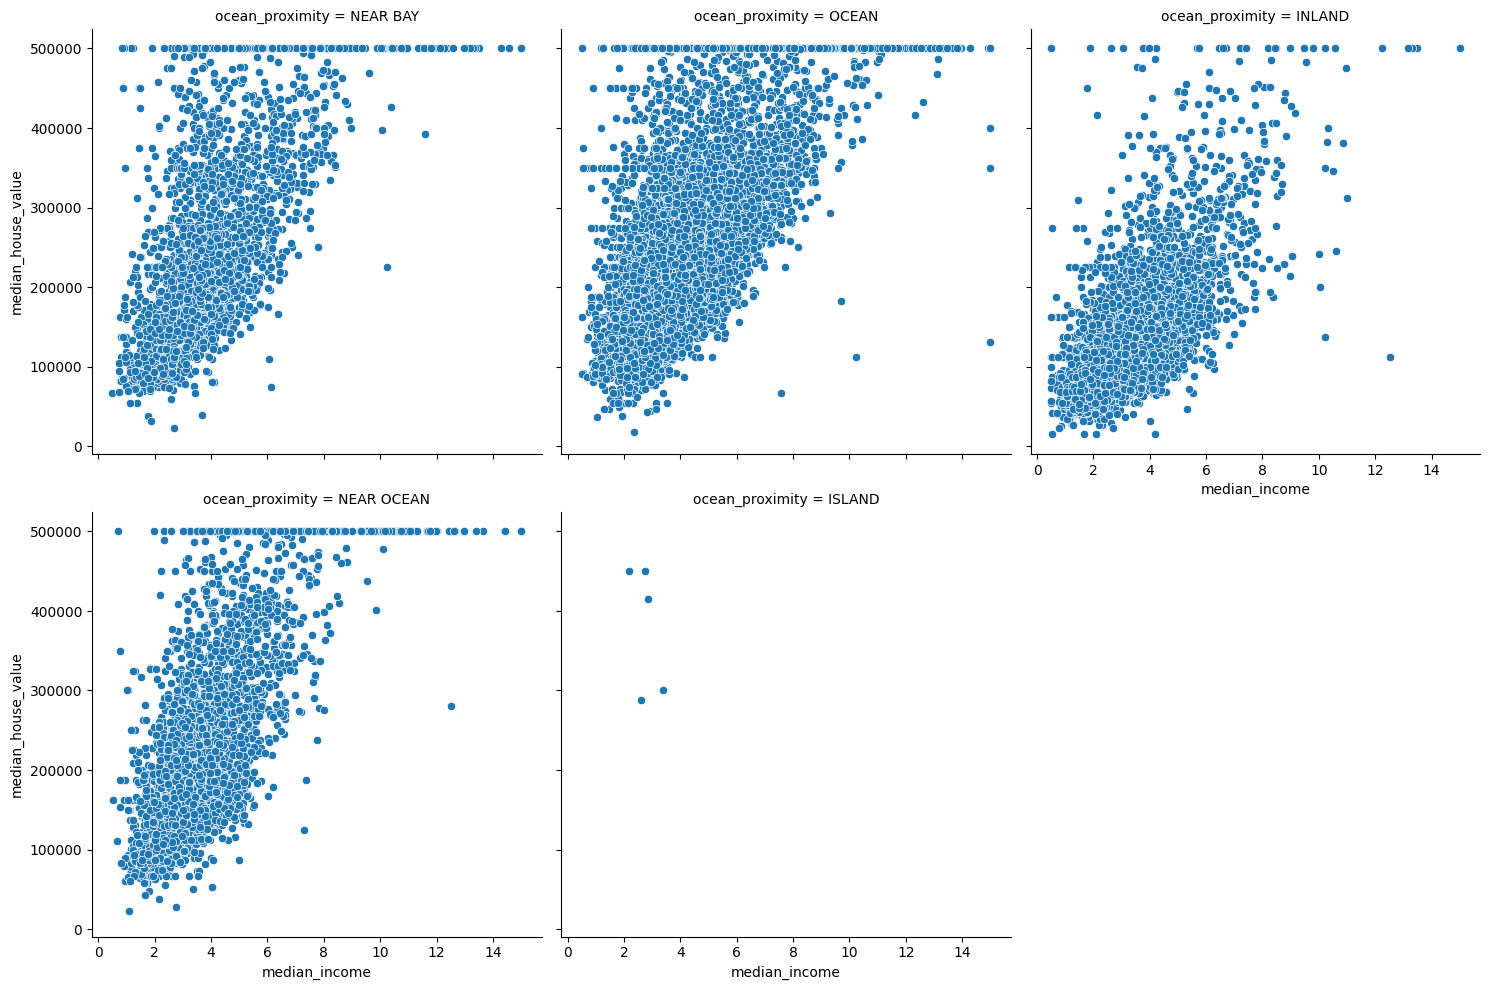

In [28]:
sns.relplot(x='median_income',y='median_house_value',data=df,col='ocean_proximity',col_wrap=3)

plt.show()


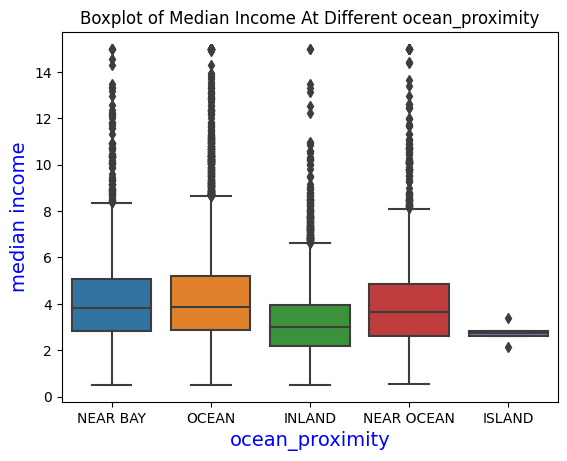

In [29]:
#Box plot for median income of different ocean_proximity
sns.boxplot(y='median_income',data=df,x='ocean_proximity')
plt.title("Boxplot of Median Income At Different ocean_proximity",fontsize=12)
plt.xlabel('ocean_proximity',fontsize=14,c='b')
plt.ylabel('median income',fontsize=14,c='b')
plt.show()

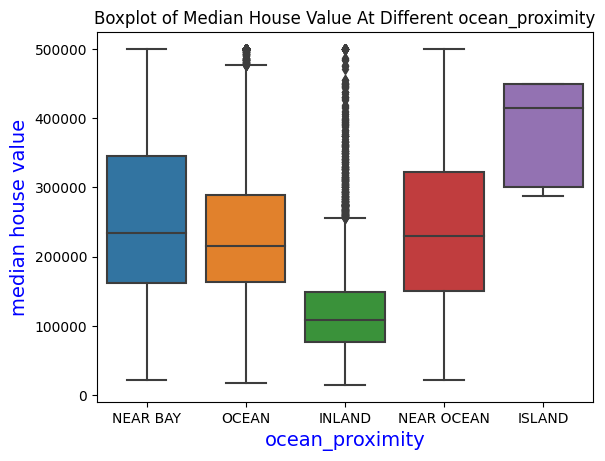

In [30]:
sns.boxplot(y='median_house_value',data=df,x='ocean_proximity')
plt.title("Boxplot of Median House Value At Different ocean_proximity",fontsize=12)
plt.xlabel('ocean_proximity',fontsize=14,c='b')
plt.ylabel('median house value',fontsize=14,c='b')
plt.show()

Note:as we see in previous graphs the ocean 'proximity-  catogery' is less important feautre ,becuase the data remain the approximity  the same by less change


# Multivariate Visulization

In [31]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


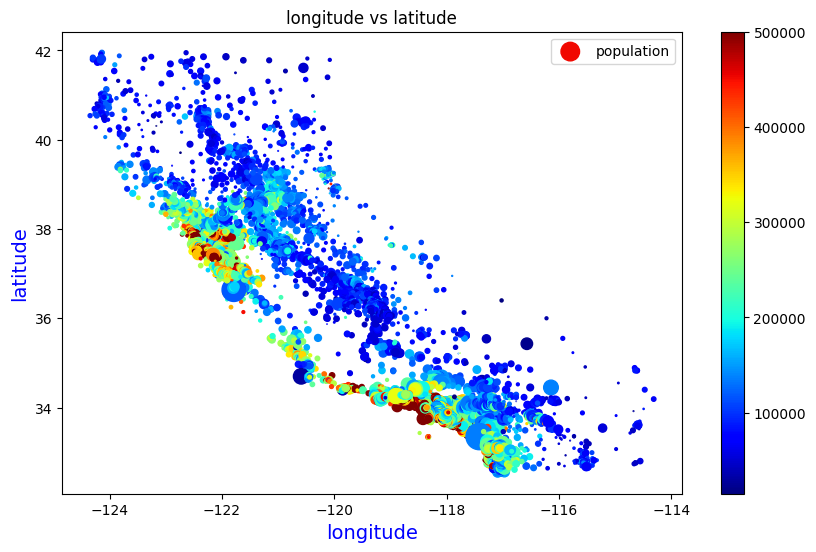

In [32]:
plt.figure(figsize=(10,6))
sc=plt.scatter(x=df['longitude'],y=df['latitude'],s=df['population']*0.01,c=df['median_house_value'],
               cmap=plt.get_cmap('jet'),label='population')
plt.colorbar(sc)
plt.title("longitude vs latitude",fontsize=12)
plt.xlabel('longitude',fontsize=14,c='b')
plt.ylabel('latitude',fontsize=14,c='b')
plt.legend()
plt.show()

# Correlation Between Features and target value

In [33]:
df.corr()['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

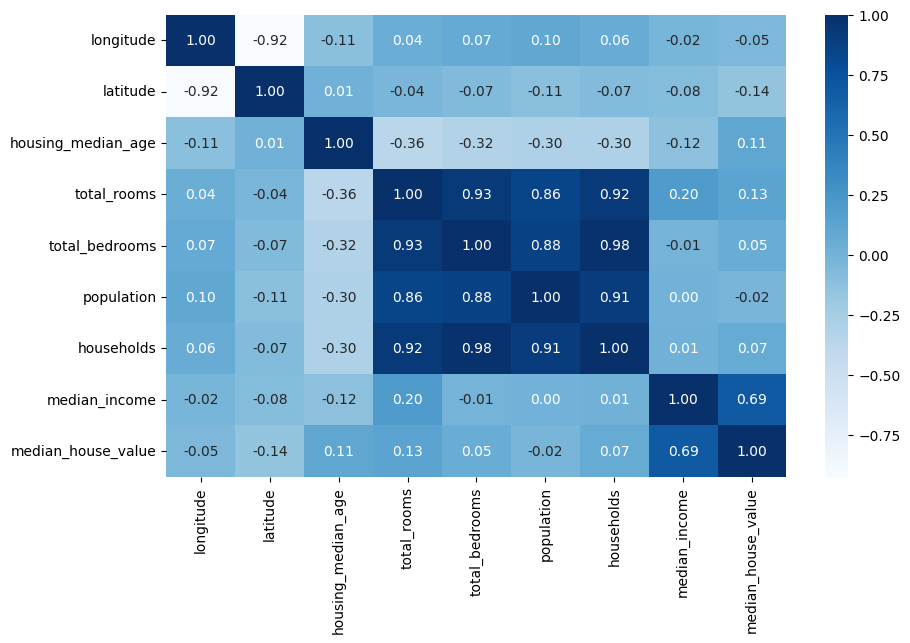

In [34]:
#heatmap correlation 
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,cmap='Blues',fmt='0.2f')
plt.show()

Note:It Seems that mean_income has the highest correlation between target ulike housholds , population and total_bedrooms have bad correlation approximity to Zero

# Feature Engineering

In [35]:
#add more columns may be useful for model
df['room_per_houseshold']=df['total_rooms']/df['households']
df['bedromms_per_rooms']=df['total_bedrooms']/df['total_rooms']
df['population_per_houseshold']=df['population']/df['households']

In [36]:
df.corr()['median_house_value'].sort_values(ascending=False)

median_house_value           1.000000
median_income                0.688075
room_per_houseshold          0.151948
total_rooms                  0.134153
housing_median_age           0.105623
households                   0.065843
total_bedrooms               0.049686
population_per_houseshold   -0.023737
population                  -0.024650
longitude                   -0.045967
latitude                    -0.144160
bedromms_per_rooms          -0.255880
Name: median_house_value, dtype: float64

# Split Data

In [37]:
X=df.drop(columns='median_house_value')
Y=df['median_house_value']

In [38]:
#show X shape
X.shape

(20640, 12)

In [39]:
#split data to train ,test
X_train,X_test,y_train,y_test=train_test_split(X,Y,shuffle=True ,test_size=0.2,random_state=42)

In [40]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (16512, 12)
X_test (4128, 12)
y_train (16512,)
y_test (4128,)


# Dealing With Nulls

In [41]:
num_cols=[col for col in X_train.columns if X_train[col].dtype in ['int32','int64','float32','float64'] ]

In [42]:
num_cols

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'room_per_houseshold',
 'bedromms_per_rooms',
 'population_per_houseshold']

In [43]:
cat_cols=list(set(X_train.columns)-set(num_cols))

In [44]:
cat_cols

['ocean_proximity']

In [45]:
#fill null data by simpleimputer
imputer=SimpleImputer(strategy='median')

In [46]:
X_train_filled=imputer.fit_transform(X_train[num_cols])
X_test_filled=imputer.transform(X_test[num_cols])
X_train_filled

array([[-117.03      ,   32.71      ,   33.        , ...,    5.0176565 ,
           0.20057582,    3.6918138 ],
       [-118.16      ,   33.77      ,   49.        , ...,    4.47354497,
           0.23270254,    1.73809524],
       [-120.48      ,   34.66      ,    4.        , ...,    5.64583333,
           0.17448603,    2.72321429],
       ...,
       [-118.38      ,   34.03      ,   36.        , ...,    3.98671727,
           0.27082342,    3.33206831],
       [-121.96      ,   37.58      ,   15.        , ...,    6.39534884,
           0.16699301,    3.17889088],
       [-122.42      ,   37.77      ,   52.        , ...,    3.40257649,
           0.31116895,    2.10869565]])

In [47]:
pd.DataFrame(X_train_filled).isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
dtype: int64

# Preprocessing Data(Standard scalar)

In [48]:
scalar=StandardScaler()
X_pre_train=scalar.fit_transform(X_train_filled)
X_pre_test=scalar.transform(X_test_filled)

In [49]:
scalar.mean_

array([-1.19582290e+02,  3.56431492e+01,  2.86082849e+01,  2.64200478e+03,
        5.38496851e+02,  1.42645300e+03,  4.99986919e+02,  3.88075426e+00,
        5.43523502e+00,  2.12857974e-01,  3.09696119e+00])

In [50]:
X_train_filled.mean(axis=0)

array([-1.19582290e+02,  3.56431492e+01,  2.86082849e+01,  2.64200478e+03,
        5.38496851e+02,  1.42645300e+03,  4.99986919e+02,  3.88075426e+00,
        5.43523502e+00,  2.12857974e-01,  3.09696119e+00])

# Pipline For Numerical Features

In [51]:
num_pipeline=Pipeline(steps=[
    ('selector',DataFrameSelector(num_cols)),
    ('imputer',SimpleImputer(strategy='median')),
    ('scalar',StandardScaler())
])

In [52]:
X_train_num=num_pipeline.fit_transform(X_train[num_cols])
X_test_num=num_pipeline.transform(X_test[num_cols])

In [53]:
lbel_en=LabelEncoder()
X_train_encoded=lbel_en.fit_transform(np.squeeze(X_train[cat_cols].values))
X_test_encoded=lbel_en.fit_transform(np.squeeze(X_test[cat_cols].values))


In [54]:
X_train_encoded

array([3, 3, 3, ..., 4, 4, 2])

In [55]:
one_en=OneHotEncoder(sparse=False)
X_train_hot=one_en.fit_transform(X_train[cat_cols])
X_test_hot=one_en.fit_transform(X_test[cat_cols])

In [56]:
X_train_hot

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.]])

# Pipeline for Categorical Data

In [57]:
pipeline_cat=Pipeline(steps=[
    ('selector',DataFrameSelector(cat_cols)),
    ('imputer',SimpleImputer(strategy='constant',fill_value='missing')),
    ('ohe',OneHotEncoder(sparse=False))
])

In [58]:
X_train_cat=pipeline_cat.fit_transform(X_train[cat_cols])
X_test_cat=pipeline_cat.transform(X_test[cat_cols])

In [59]:
X_train_cat

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.]])

In [60]:
X_train_full=np.column_stack((X_train_num,X_train_cat))
X_test_full=np.column_stack((X_test_num,X_test_cat))

In [61]:
total_pipeline=FeatureUnion(transformer_list=[
    ('num',num_pipeline),
    ('cat',pipeline_cat)
])

In [62]:
X_train_final=total_pipeline.fit_transform(X_train)
X_test_final=total_pipeline.transform(X_test)

In [63]:
X_train_final

array([[ 1.27258656, -1.3728112 ,  0.34849025, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.70916212, -0.87669601,  1.61811813, ...,  0.        ,
         1.        ,  0.        ],
       [-0.44760309, -0.46014647, -1.95271028, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.59946887, -0.75500738,  0.58654547, ...,  0.        ,
         0.        ,  1.        ],
       [-1.18553953,  0.90651045, -1.07984112, ...,  0.        ,
         0.        ,  1.        ],
       [-1.41489815,  0.99543676,  1.85617335, ...,  1.        ,
         0.        ,  0.        ]])

In [64]:
X_train_final.shape,X_test_final.shape

((16512, 16), (4128, 16))

In [65]:
y_train.shape,y_test.shape

((16512,), (4128,))

# Building Model

# Linear Regression

In [66]:
lin_reg=LinearRegression()
lin_reg.fit(X_train_final,y_train)

LinearRegression()

In [67]:
lin_reg.coef_,lin_reg.intercept_

(array([-56276.05885186, -56638.23115891,  14122.30475198,   5881.10498027,
          5307.66299678, -46320.28547056,  40233.72484825,  78904.43939684,
          7699.44848838,  16809.10455136,    750.3679429 , -53617.84037612,
        112060.2444519 , -24109.18513167, -15666.74039081, -18666.47855331]),
 237125.77897391893)

In [68]:
mse=cross_val_score(estimator=lin_reg,X=X_train_final,y=y_train,cv=5,n_jobs=-1,scoring='neg_mean_squared_error')

In [69]:
mse=mse*-1
mse

array([4.62996840e+09, 4.43494456e+09, 4.48026660e+09, 4.46990660e+09,
       5.01444582e+09])

In [70]:
rmse_scores=np.sqrt(mse)
np.mean(rmse_scores)

67848.831224664

In [71]:
y_pred_val=cross_val_predict(estimator=lin_reg,X=X_train_final,y=y_train,cv=5,n_jobs=-1,method='predict')
y_pred_val

array([181233.21409724, 289117.73907399, 245822.14956774, ...,
       194789.46278477, 278573.17276914, 272291.34997922])

In [72]:
np.sqrt(mean_squared_error(y_pred_val,y_train))

67866.76284731018

# SGDReg

In [73]:
sgd_reg=SGDRegressor(penalty='l2',alpha=0.0001,shuffle=True,max_iter=10000,eta0=0.001)
sgd_reg.fit(X_train_final,y_train)

SGDRegressor(eta0=0.001, max_iter=10000)

In [74]:
#cross validation scroe 5 fold
mse=cross_val_score(estimator=sgd_reg,X=X_train_final,y=y_train,cv=5,n_jobs=-1,scoring='neg_mean_squared_error')
mse=mse*-1
mse

array([4.63909578e+09, 4.44742781e+09, 4.51788108e+09, 4.48059395e+09,
       5.00848313e+09])

In [75]:
#root Mean Square Error for scores
rmse_scores=np.sqrt(mse)
np.mean(rmse_scores)

67944.60146665116

In [76]:
y_pred_val=cross_val_predict(estimator=sgd_reg,X=X_train_final,y=y_train,cv=5,n_jobs=-1,method='predict')
y_pred_val.shape

(16512,)

In [77]:
np.sqrt(mean_squared_error(y_pred_val,y_train))

67980.43218516899

# Ridge

In [78]:
ridge_reg=Ridge(alpha=0.1,solver='auto')
ridge_reg.fit(X_train_final,y_train)

Ridge(alpha=0.1)

In [79]:
#cross validation scroe 5 fold
mse=cross_val_score(estimator=ridge_reg,X=X_train_final,y=y_train,cv=5,n_jobs=-1,scoring='neg_mean_squared_error')
mse=mse*-1
mse

array([4.62980885e+09, 4.43494907e+09, 4.48052216e+09, 4.46954927e+09,
       5.01449009e+09])

In [80]:
#root Mean Square Error for scores
rmse_scores=np.sqrt(mse)
np.mean(rmse_scores)

67848.51333999282

In [81]:
y_train.shape

(16512,)

In [82]:
y_pred_val=cross_val_predict(estimator=ridge_reg,X=X_train_final,y=y_train,cv=5,n_jobs=-1,method='predict')
y_pred_val.shape

(16512,)

In [83]:
np.sqrt(mean_squared_error(y_pred_val,y_train))

67866.44963036691

# Lasso

In [84]:
lasso_reg=Lasso(alpha=0.1,max_iter=1000)
lasso_reg.fit(X_train_final,y_train)

Lasso(alpha=0.1)

In [85]:
lasso_reg.coef_

array([-56274.10135945, -56636.49191666,  14122.22043865,   5880.35767985,
         5309.54549811, -46318.93425315,  40231.16017765,  78904.46437285,
         7699.10836076,  16808.80010627,    750.13271024, -34951.94828762,
       130314.42049331,  -5440.84765773,   2999.39887839,     -0.        ])

In [86]:
#cross validation scroe 5 fold
mse=cross_val_score(estimator=lasso_reg,X=X_train_final,y=y_train,cv=5,n_jobs=-1,scoring='neg_mean_squared_error')
mse=mse*-1
mse

array([4.62995074e+09, 4.43494897e+09, 4.48030664e+09, 4.46987059e+09,
       5.01444200e+09])

In [87]:
#root Mean Square Error for scores
rmse_scores=np.sqrt(mse)
np.mean(rmse_scores)

67848.81245171995

In [88]:
y_pred_val=cross_val_predict(estimator=lasso_reg,X=X_train_final,y=y_train,cv=5,n_jobs=-1,method='predict')
y_pred_val

array([181233.5562831 , 289116.31331623, 245820.48868497, ...,
       194789.86113464, 278572.80909161, 272291.24877346])

In [89]:
np.sqrt(mean_squared_error(y_pred_val,y_train))

67866.74362464642

# Elastic_Net

In [90]:
elstic_reg=ElasticNet(alpha=0.1,l1_ratio=0.5)
elstic_reg.fit(X_train_final,y_train)

ElasticNet(alpha=0.1)

In [91]:
#cross validation scroe 5 fold
mse=cross_val_score(estimator=elstic_reg,X=X_train_final,y=y_train,cv=5,n_jobs=-1,scoring='neg_mean_squared_error')
mse=mse*-1
mse

array([4.77323792e+09, 4.55454812e+09, 4.64031081e+09, 4.57534475e+09,
       4.95329255e+09])

In [92]:
#root Mean Square Error for scores
rmse_scores=np.sqrt(mse)
np.mean(rmse_scores)

68543.3538305016

In [93]:
y_pred_val=cross_val_predict(estimator=elstic_reg,X=X_train_final,y=y_train,cv=5,n_jobs=-1,method='predict')
y_pred_val

array([189496.71376886, 277522.31195723, 223678.46592594, ...,
       197277.90297003, 276151.71692393, 255337.55040224])

In [94]:
np.sqrt(mean_squared_error(y_pred_val,y_train))

68551.75078137711

# PolynomialRegression

In [95]:
poly_feat=PolynomialFeatures(degree=2,include_bias=False)
x_poly=poly_feat.fit_transform(X_train_final)

In [96]:
x_poly.shape

(16512, 152)

In [97]:
lin_poly=LinearRegression()
lin_poly.fit(x_poly,y_train)

LinearRegression()

# KNN

In [98]:
knn_reg=KNeighborsRegressor(n_neighbors=5,weights='uniform',p=2)
knn_reg.fit(X_train_final,y_train)

KNeighborsRegressor()

In [99]:
#cross validation scroe 5 fold
mse=cross_val_score(estimator=knn_reg,X=X_train_final,y=y_train,cv=5,n_jobs=-1,scoring='neg_mean_squared_error')
mse=mse*-1
mse

array([3.97021732e+09, 3.63484551e+09, 3.82821261e+09, 3.68473103e+09,
       3.90570614e+09])

In [100]:
#root Mean Square Error for scores
rmse_scores=np.sqrt(mse)
np.mean(rmse_scores)

61673.90524416217

In [101]:
y_pred_val=cross_val_predict(estimator=knn_reg,X=X_train_final,y=y_train,cv=5,n_jobs=-1,method='predict')
y_pred_val

array([126840., 358820., 227580., ..., 172860., 260560., 307240.])

In [102]:
y_pred_val.shape

(16512,)

In [103]:
np.sqrt(mean_squared_error(y_pred_val,y_train))

61682.592802721745

# Random Forest

In [104]:
random_reg=RandomForestRegressor(n_estimators=150,max_depth=6,max_samples=0.8)
random_reg.fit(X_train_final,y_train)

RandomForestRegressor(max_depth=6, max_samples=0.8, n_estimators=150)

In [105]:
#cross validation scroe 5 fold
mse=cross_val_score(estimator=random_reg,X=X_train_final,y=y_train,cv=5,n_jobs=-1,scoring='neg_mean_squared_error')
mse=mse*-1
mse

array([3.63016631e+09, 3.52006645e+09, 3.64000862e+09, 3.50459090e+09,
       3.70260887e+09])

In [106]:
#root Mean Square Error for scores
rmse_scores=np.sqrt(mse)
np.mean(rmse_scores)

59992.42898997538

In [107]:
y_pred_val=cross_val_predict(estimator=random_reg,X=X_train_final,y=y_train,cv=5,n_jobs=-1,method='predict')
y_pred_val

array([175209.22377974, 383940.47765101, 235494.13177941, ...,
       172375.35523338, 252592.88215235, 264112.02614123])

In [108]:
np.sqrt(mean_squared_error(y_pred_val,y_train))

60028.951645078974

In [109]:
params_best={'n_estimators':np.arange(200,600,50),
            'max_depth':np.arange(4,20,2),
            'max_samples':[0.2,0.4,0.6,0.8,1]}

In [110]:
search_param=RandomizedSearchCV(estimator=random_reg,param_distributions=params_best,n_iter=20,scoring='neg_mean_squared_error',
                  cv=5,verbose=6)
search_param.fit(X_train_final,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END max_depth=12, max_samples=1, n_estimators=300;, score=-13691143459.637 total time=   0.5s
[CV 2/5] END max_depth=12, max_samples=1, n_estimators=300;, score=-12989923882.944 total time=   0.4s
[CV 3/5] END max_depth=12, max_samples=1, n_estimators=300;, score=-13471868043.680 total time=   0.5s
[CV 4/5] END max_depth=12, max_samples=1, n_estimators=300;, score=-13049083941.137 total time=   0.6s
[CV 5/5] END max_depth=12, max_samples=1, n_estimators=300;, score=-13648251660.535 total time=   0.6s
[CV 1/5] END max_depth=8, max_samples=0.2, n_estimators=450;, score=-3159328677.790 total time=   8.6s
[CV 2/5] END max_depth=8, max_samples=0.2, n_estimators=450;, score=-3109707049.024 total time=  11.6s
[CV 3/5] END max_depth=8, max_samples=0.2, n_estimators=450;, score=-3142993400.987 total time=   9.8s
[CV 4/5] END max_depth=8, max_samples=0.2, n_estimators=450;, score=-3018422479.815 total time=   8.9s
[CV 5/5] EN

RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(max_depth=6, max_samples=0.8,
                                                   n_estimators=150),
                   n_iter=20,
                   param_distributions={'max_depth': array([ 4,  6,  8, 10, 12, 14, 16, 18]),
                                        'max_samples': [0.2, 0.4, 0.6, 0.8, 1],
                                        'n_estimators': array([200, 250, 300, 350, 400, 450, 500, 550])},
                   scoring='neg_mean_squared_error', verbose=6)

In [111]:
search_param.best_params_

{'n_estimators': 500, 'max_samples': 0.6, 'max_depth': 16}

In [112]:
model_tuned=search_param.best_estimator_

In [113]:
#cross validation scroe 5 fold
mse=cross_val_score(estimator=model_tuned,X=X_train_final,y=y_train,cv=5,n_jobs=-1,scoring='neg_mean_squared_error')
mse=mse*-1
#root Mean Square Error for scores
rmse_scores=np.sqrt(mse)
print("root_mean_squared for tuned random forest",np.mean(rmse_scores))


y_pred_val=cross_val_predict(estimator=model_tuned,X=X_train_final,y=y_train,cv=5,n_jobs=-1,method='predict')

print("root_mean_squared after prediction",np.sqrt(mean_squared_error(y_pred_val,y_train)))



root_mean_squared for tuned random forest 50736.99775343145
root_mean_squared after prediction 50778.49675116914


# Feature Importance From RF

In [114]:
feat_importance_rf={}
for name , value in zip(num_cols,model_tuned.feature_importances_[:11]):
    feat_importance_rf[name]=value

In [115]:
feat_importance_rf

{'longitude': 0.05410274080714036,
 'latitude': 0.05187074016565163,
 'housing_median_age': 0.04379473084358509,
 'total_rooms': 0.012273478672564092,
 'total_bedrooms': 0.011166312017740716,
 'population': 0.0112524981300939,
 'households': 0.009728283131831092,
 'median_income': 0.4886481528172815,
 'room_per_houseshold': 0.02503629333920266,
 'bedromms_per_rooms': 0.022863677913772633,
 'population_per_houseshold': 0.12233562006534861}

In [116]:
df_imp=pd.DataFrame({'Features':feat_importance_rf.keys(),'Scores':feat_importance_rf.values()})
df_imp=df_imp.sort_values(by='Scores',ascending=False)

In [117]:
df_imp

,Features,Scores
7,median_income,0.488648
10,population_per_houseshold,0.122336
0,longitude,0.054103
1,latitude,0.051871
2,housing_median_age,0.043795
8,room_per_houseshold,0.025036
9,bedromms_per_rooms,0.022864
3,total_rooms,0.012273
5,population,0.011252
4,total_bedrooms,0.011166


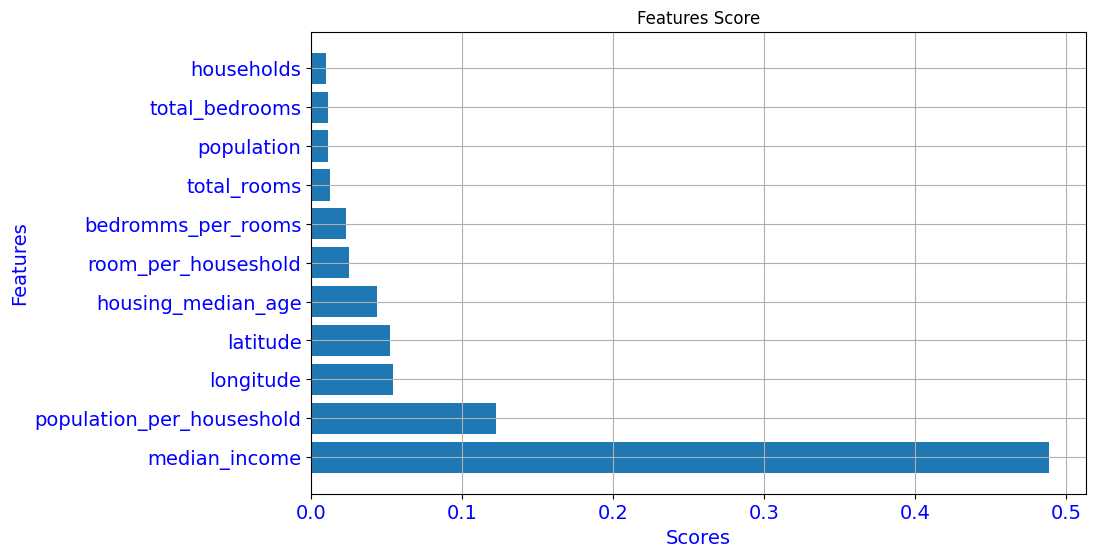

In [118]:
#show income bins
plt.figure(figsize=(10,6))
plt.barh(width=df_imp['Scores'],y=df_imp['Features'])
plt.title("Features Score",fontsize=12)
plt.xlabel('Scores',fontsize=14,c='b')
plt.ylabel('Features',fontsize=14,c='b')
plt.xticks(fontsize=14,c='b')
plt.yticks(fontsize=14,c='b')
plt.grid('on')
plt.show()

# XGBOOST

In [121]:
xg_reg=XGBRegressor(n_estimators=100,max_depth=6,learning_rate=0.1,subsample=0.8)
xg_reg.fit(X_train_final,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [122]:
#cross validation scroe 5 fold
mse=cross_val_score(estimator=xg_reg,X=X_train_final,y=y_train,cv=5,n_jobs=-1,scoring='neg_mean_squared_error')
mse=mse*-1
#root Mean Square Error for scores
rmse_scores=np.sqrt(mse)
print("root_mean_squared for xgboost",np.mean(rmse_scores))


y_pred_val=cross_val_predict(estimator=xg_reg,X=X_train_final,y=y_train,cv=5,n_jobs=-1,method='predict')

print("root_mean_squared after prediction",np.sqrt(mean_squared_error(y_pred_val,y_train)))

root_mean_squared for xgboost 47643.879825047596
root_mean_squared after prediction 47645.64971306159


In [123]:
params_bes_xg={'n_estimators':np.arange(100,200,50),
            'max_depth':np.arange(4,15,2),
            'subsample':[0.6,0.8],
               'learning_rate':[0.1,0.2]
}

In [128]:
grid_xgb=GridSearchCV(estimator=xg_reg,param_grid=params_bes_xg,cv=5,n_jobs=-1,verbose=6,
                     scoring='neg_mean_squared_error')
grid_xgb.fit(X_train_final,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[18:47:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_samples" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    callbacks=None, colsample_bylevel=1,
                                    colsample_bynode=1, colsample_bytree=1,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=0, gpu_id=-1, grow_policy='depthwise',
                                    importance_type=None,
                                    interaction_constraints='',
                                    learning_rate=0.1, max_bin=256,
                                    max_cat_to_oneh...
                                    max_depth=6, max_leaves=0,
                                    min_child_weight=1, missing=nan,
                                    monotone_constraints='()', n_estimators=100,
                                    n_jobs=0, num_parallel_tree=1,
                                    predictor='auto', random_state=0,
                                    reg_alpha=0, reg_lambda=1, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.2],
                         'max_depth': array([ 4,  6,  8, 10, 12, 14]),
                         'max_samples': [0.6, 0.8],
                         'n_estimators': array([100, 150])},
             scoring='neg_mean_squared_error', verbose=6)

In [130]:
grid_xgb.best_params_

{'learning_rate': 0.1, 'max_depth': 8, 'max_samples': 0.6, 'n_estimators': 150}

In [131]:
tuned_xgb=grid_xgb.best_estimator_

In [132]:
#cross validation scroe 5 fold
mse=cross_val_score(estimator=tuned_xgb,X=X_train_final,y=y_train,cv=5,n_jobs=-1,scoring='neg_mean_squared_error')
mse=mse*-1
#root Mean Square Error for scores
rmse_scores=np.sqrt(mse)
print("root_mean_squared for tuned_xgboost",np.mean(rmse_scores))


y_pred_val=cross_val_predict(estimator=tuned_xgb,X=X_train_final,y=y_train,cv=5,n_jobs=-1,method='predict')

print("root_mean_squared after prediction",np.sqrt(mean_squared_error(y_pred_val,y_train)))

root_mean_squared for tuned_xgboost 46005.68207875519
root_mean_squared after prediction 46007.32852679648


# Features Importance Using XGBoost

In [133]:
feat_xgb=tuned_xgb.get_booster().get_score(importance_type='weight')

In [146]:
df_feat_xgb=pd.DataFrame.from_dict(feat_xgb,orient='index')
df_feat_xgb=df_feat_xgb.reset_index()
df_feat_xgb=df_feat_xgb.rename(columns={'index':'Features',0:'Score'})
df_feat_xgb=df_feat_xgb[:11]
df_feat_xgb['Features']=num_cols
df_feat_xgb=df_feat_xgb.sort_values(by='Score',ascending=False)
df_feat_xgb

,Features,Score
0,longitude,4429.0
1,latitude,3114.0
7,median_income,2555.0
10,population_per_houseshold,2320.0
2,housing_median_age,2005.0
8,room_per_houseshold,1819.0
3,total_rooms,1697.0
9,bedromms_per_rooms,1674.0
5,population,1170.0
4,total_bedrooms,887.0


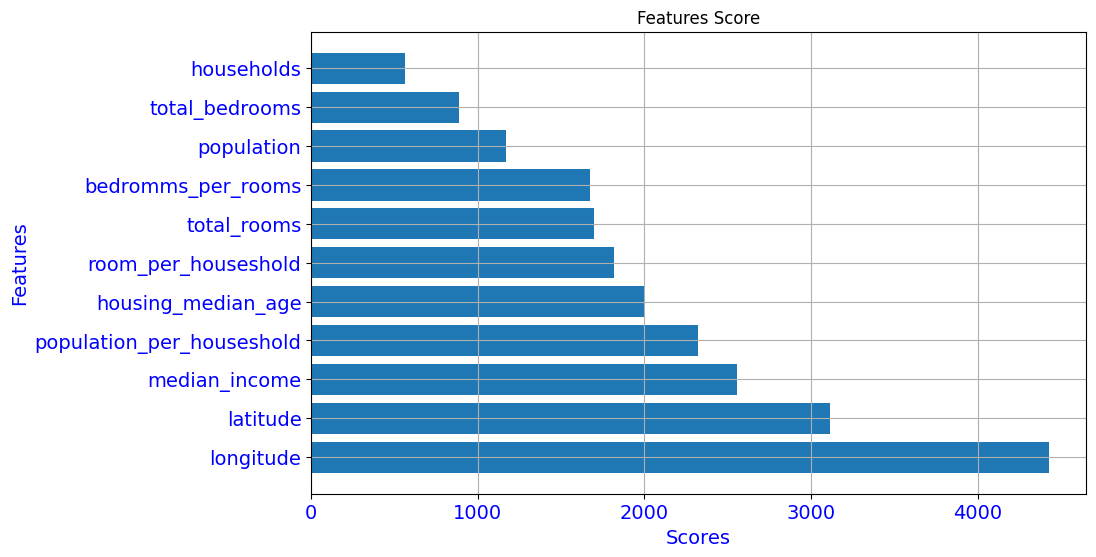

In [147]:
#show Importance Features
plt.figure(figsize=(10,6))
plt.barh(width=df_feat_xgb['Score'],y=df_feat_xgb['Features'])
plt.title("Features Score",fontsize=12)
plt.xlabel('Scores',fontsize=14,c='b')
plt.ylabel('Features',fontsize=14,c='b')
plt.xticks(fontsize=14,c='b')
plt.yticks(fontsize=14,c='b')
plt.grid('on')
plt.show()

Best Model is XGboost made best accuracy

# Download THe Model

In [148]:
joblib.dump(tuned_xgb,'model_xgb.pkl')

['model_xgb.pkl']

In [151]:
loaded_model=joblib.load('model_xgb.pkl')

# Inference On DataSet

In [154]:
y_pred_test=loaded_model.predict(X_test_final)

In [155]:
np.sqrt(mean_squared_error(y_pred_test,y_test))

44999.162880444645